#  Dimensionality Reduction with PCA

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

from sklearn.model_selection import train_test_split

In [2]:
# Import custom classes
%run -i '../src/helper/transfxn.py'
%run -i '../src/helper/zimputer.py'

In [3]:
# Instantiate the classes
transfxn = TransformationPipeline()
imputer = DataFrameImputer()

# Load data

In [11]:
df = pd.read_csv('../data/feat_engr_data.csv') # load cleaned data
print('Data size',df.shape) # data size
df.head()

Data size (6771768, 42)


,c_year,c_mnth,c_wday,c_hour,class,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,c_rcfg_ct,hour_ct_per_day_ct,hour_ct_per_month_ct,pisev_ct_per_hour_ct,conf_ct_per_hour_ct,psafe_ct_per_hour_ct,wthr_ct_per_hour_ct,vtype_ct_per_hour_ct,rcfg_ct_per_hour_ct,c_conf_ind
0,1999,January,Monday,20.0,0,2.0,Right turn,NaN,Clear and sunny,Icy,...,NaN,0.278072,0.434034,10.981478,0.268553,NaN,18.938386,0.772580,NaN,N
1,1999,January,Monday,20.0,0,2.0,Right turn,NaN,Clear and sunny,Icy,...,NaN,0.278072,0.434034,10.981478,0.268553,NaN,18.938386,22.330975,NaN,N
2,1999,January,Monday,20.0,0,2.0,Right turn,NaN,Clear and sunny,Icy,...,NaN,0.278072,0.434034,14.194474,0.268553,19.230057,18.938386,22.330975,NaN,N
3,1999,January,Monday,8.0,0,1.0,Hit a moving object,NaN,"Freezing rain, sleet, hail",Snow,...,NaN,0.391691,0.611380,7.796031,0.286598,NaN,0.098990,15.853328,NaN,N
4,1999,January,Monday,8.0,0,1.0,Hit a moving object,NaN,"Freezing rain, sleet, hail",Snow,...,NaN,0.391691,0.611380,10.077019,0.286598,NaN,0.098990,NaN,NaN,N


# Reduce dataset

In [19]:
X1, X2, y1, y2 = train_test_split(df, df['class'], test_size = 0.1, random_state = 42, 
                                  stratify = df['class'])

# Create features matrix

In [20]:
# Feature matrix and class label
cols_to_drop = ['c_case', 'p_id', 'v_id', 'class']
X, y = X2.drop(cols_to_drop, axis = 1), X2['class']

In [21]:
# Re-encode the class variable
y.replace({0:'Non-fatal', 1: 'Fatal'}, inplace=True)

# Transformation pipeline

## 1. Impute missing values

In [22]:
# Fit transform the training set
X_imputed = imputer.fit_transform(X)

## 2. Pre-processing

In [23]:
# Transform and scale data
X_scaled, _, feat_nm = transfxn.preprocessing(X_imputed, X_imputed)

In [24]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (677177, 157)


# PCA plot

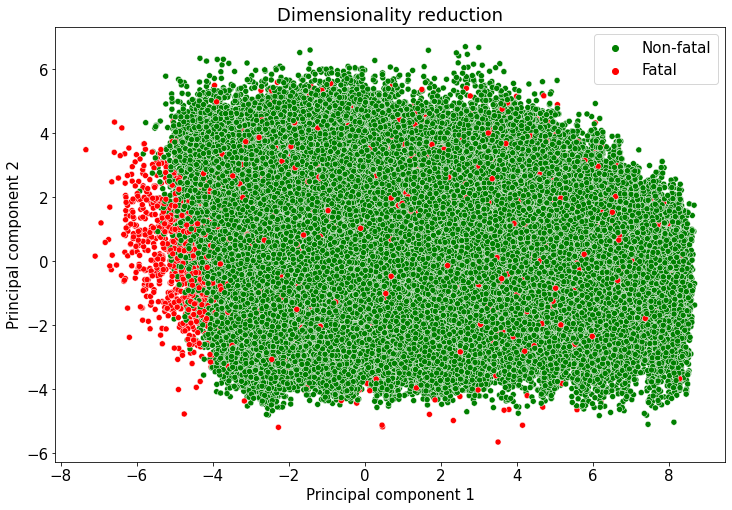

In [25]:
transfxn.pca_plot_labeled(X_scaled, y, palette = ['g', 'r'])